In [15]:
from sklearn.datasets import load_svmlight_file
from numpy import *
from sklearn.model_selection import train_test_split
data=load_svmlight_file(r'D:\australian_scale.txt')#读取数据集
X=data[0]
y=data[1]
S=zeros((690,14))
S=mat(S)
X=X+S
X=X.getA()
c=ones(X.shape[0])#插入一列1，这样参数b就相当与W0
X=insert(X, 0, values=c, axis=1)
X=mat(X)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)#切分数据集
y_train=y_train.reshape(462,1)
y_train=mat(y_train)
y_validation=y_validation.reshape(228,1)
y_validation=mat(y_validation)
W=array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])#模型参数初始化
W=W.reshape(1,15)
W=mat(W)
lamda=0.00001#lamda为学习率
i=0
S=array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])#存储G
S=S.reshape(1,15)
S=mat(S)
k=0
m=0
loss_train=[]#存储训练集的loss
loss_validation=[]#存储验证集的loss
ix1=[]#存储迭代次数
while 1:
    ix1.append(k)
    loss=0
    lossv=0
    #计算训练集的loss值
    for j in range(462):
        if y_train[j]*(X_train[j]*W.transpose())<1:
            loss=loss+1
    loss_train.append(loss)
    #计算验证集的loss值
    for j in range(228):
        if y_validation[j]*(X_validation[j]*W.transpose())<1:
            lossv=lossv+1
    loss_validation.append(lossv)
    
    for i in range(462):
        fx=1-y_train[i]*(X_train[i]*W.transpose())
        if fx>=0:
            G=-0.1*y_train[i]*X_train[i]
        else:
            G=0
        S=S+G
    S=(S+W)#S是求出的梯度
    D=-S#D取梯度的反方向
    W=W+lamda*D#更新模型参数
    if loss<0.01 or k>500:#若loss值小于0.01或者迭代次数大于500则停止
        break
    k=k+1

Text(0,0.5,'loss')

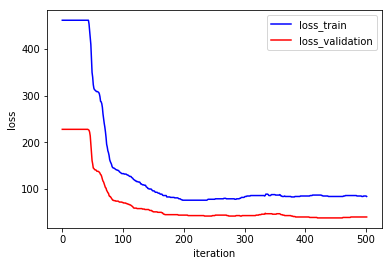

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ix1,loss_train,'b-',lw=1.5,label='loss_train')
plt.plot(ix1,loss_validation,'r-',lw=1.5,label='loss_validation')
plt.legend(loc='upper right')
plt.xlabel('iteration')
plt.ylabel('loss')